In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

Using TensorFlow backend.


# Load Dataset

In [2]:
data = pd.read_csv('dataset/005930.KS_5y.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-30,29700.0,30000.0,29680.0,30000.0,41.274914,10588400
1,2013-10-31,29960.0,30040.0,29300.0,29300.0,40.311840,12647050
2,2013-11-01,29800.0,30000.0,29360.0,30000.0,41.274914,11357700
3,2013-11-04,29840.0,30040.0,29780.0,29980.0,41.247398,10887800
4,2013-11-05,30040.0,30040.0,29440.0,29700.0,40.862167,8009300


# Compute Mid Price

In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

# Create Windows

In [4]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [5]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1057, 50, 1), (117, 50, 1))

# Build a Model

In [6]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [7]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)


Train on 1057 samples, validate on 117 samples
Epoch 1/20
1057/1057 [==============================] - 10s 9ms/step - loss: 0.0014 - val_loss: 5.1729e-04
Epoch 2/20
1057/1057 [==============================] - 9s 8ms/step - loss: 6.8536e-04 - val_loss: 7.9509e-04
Epoch 3/20
1057/1057 [==============================] - 9s 8ms/step - loss: 5.2169e-04 - val_loss: 2.6170e-04
Epoch 4/20
1057/1057 [==============================] - 9s 8ms/step - loss: 4.0147e-04 - val_loss: 4.1982e-04
Epoch 5/20
1057/1057 [==============================] - 9s 8ms/step - loss: 3.3792e-04 - val_loss: 2.4327e-04
Epoch 6/20
1057/1057 [==============================] - 10s 10ms/step - loss: 2.7947e-04 - val_loss: 1.4461e-04
Epoch 7/20
1057/1057 [==============================] - 9s 9ms/step - loss: 2.3929e-04 - val_loss: 2.0548e-04
Epoch 8/20
1057/1057 [==============================] - 9s 9ms/step - loss: 2.3552e-04 - val_loss: 2.6496e-04
Epoch 9/20
1057/1057 [==============================] - 9s 8ms/step - los

# Prediction

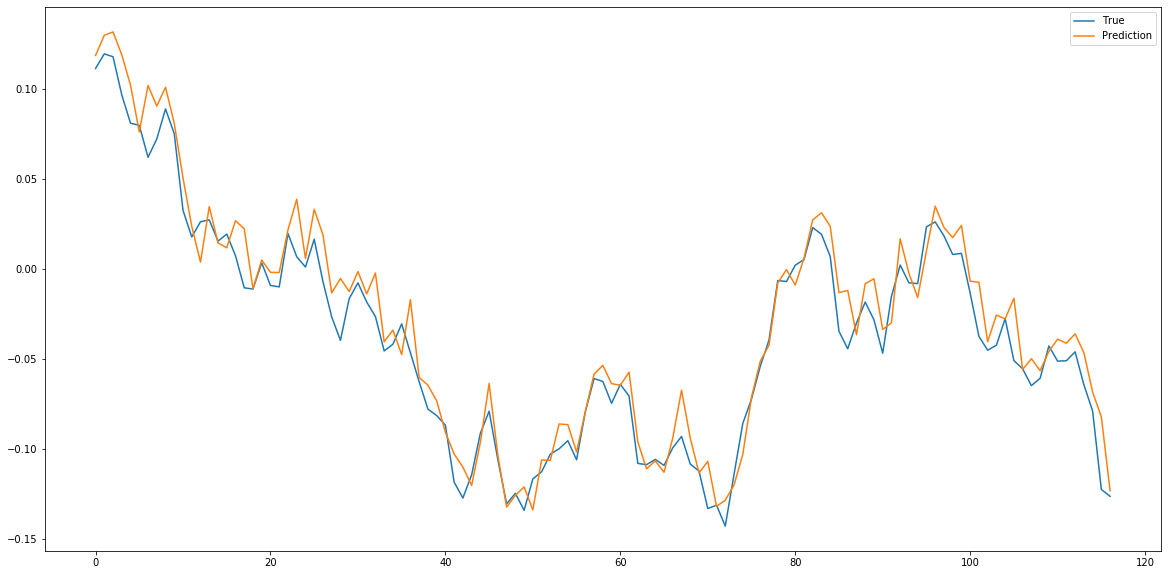

In [8]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()